In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ssd_data import InputGenerator

### Split / Merge

In [10]:
from data_cracker import GTUtility

gt_util_cr = GTUtility('data/KSIGNBOARD/',f = True)

/home/ina/anaconda3/envs/ina/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:768: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41493
  " Skipping tag %s" % (size, len(data), tag))
/home/ina/anaconda3/envs/ina/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:768: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  " Skipping tag %s" % (size, len(data), tag))


In [3]:
print(gt_util_cr)

Background              0
Text                 3972

images               1085
objects              3972
per image            3.66
no annotation           0



In [4]:
from data_KSign import GTUtility
import pickle

gt_util_ai_cr = GTUtility('data/K-SIGN/Annotation/', quality = 'cr')
gt_util_high = GTUtility('data/K-SIGN/HighQuality/', quality = 'high')

In [5]:
gt_util_cr = gt_util_high.merge(gt_util_ai_cr)

In [3]:
gtu_voc_coco = gtu_voc.merge(gtu_coco.convert_to_voc())
#print(gtu_voc_coco)

In [4]:
gtu_train, gtu_val = gtu_coco.split(0.01)

In [7]:
idx, img, gt = gt_util_merge.sample()

In [8]:
gt

array([[0.7048611 , 0.35703126, 1.02569449, 0.37187499, 1.02569449,
        0.40546876, 0.69583333, 0.39765626, 1.        ]])

2
1440 2560
1
[0.0, 1.0, 0.9647031631761764, 1.0]
[[0.32734376 0.38611111]
 [0.61640626 0.49097222]
 [0.61523438 0.56041664]
 [0.32070312 0.46180555]]
<class 'numpy.ndarray'>
4
[[ 838.00003052  555.99999905]
 [1578.00003052  706.99999809]
 [1575.          806.99995995]
 [ 820.99998474  664.99999523]]
1
[0.0, 1.0, 0.9647031631761764, 1.0]
[[0.69453126 0.57222223]
 [0.85078126 0.61736113]
 [0.85624999 0.66944444]
 [0.69453126 0.62430555]]
<class 'numpy.ndarray'>
4
[[1778.00003052  824.00001526]
 [2178.00003052  889.0000248 ]
 [2191.99996948  963.99999619]
 [1778.00003052  898.99998665]]


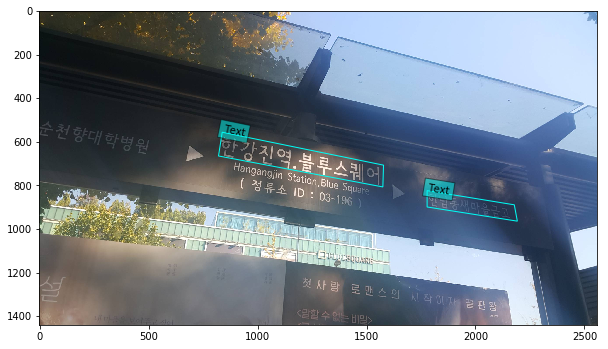

In [9]:
idx, img, gt = gt_util_cr.sample()
plt.figure(figsize=[10]*2)
plt.imshow(img)
gt_util_cr.plot_gt(gt, show_labels=True)
plt.show()

### Preserve the aspect ratio of the objects

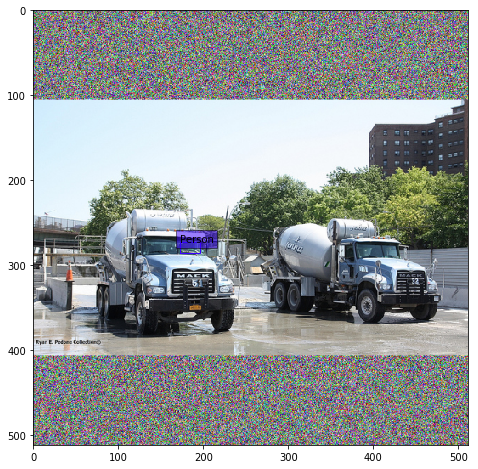

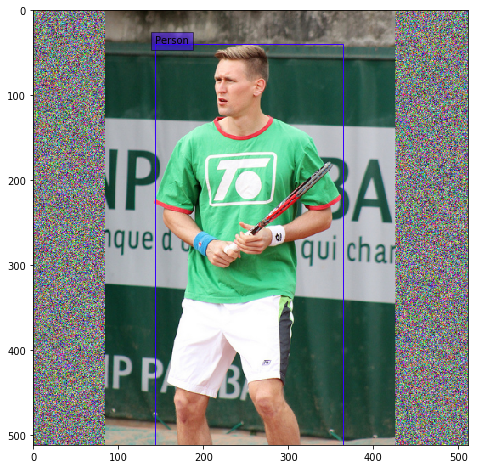

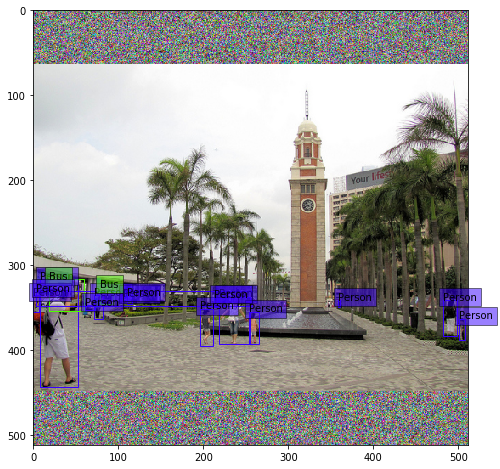

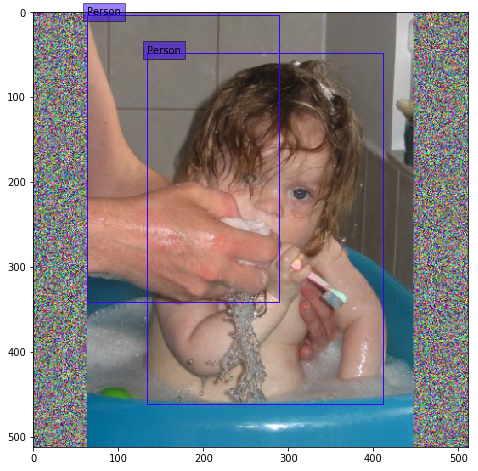

In [6]:
idxs, inputs, images, data = gtu_voc_coco.sample_random_batch(batch_size=4, seed=None, preserve_aspect_ratio=True)

for i in range(len(data)):
    plt.figure(figsize=[8]*2)
    plt.imshow(images[i])
    gtu_voc_coco.plot_gt(data[i])
    plt.show()

### Generator

In [7]:
batch_size = 4
image_size = (512, 512)

class PriorUtilDummy(object):
    def encode(self, gt_data, overlap_threshold=0.5, debug=False):
        #print(type(gt_data), gt_data.shape)
        gt_data = np.zeros((2,10))
        return gt_data

prior_util = PriorUtilDummy()

gen_train = InputGenerator(gtu_train, prior_util, 
        batch_size, image_size,
        augmentation=False,
        hflip_prob=0.5, vflip_prob=0.0, 
        do_crop=True,
        #crop_area_range=[0.75, 1.0],
        crop_area_range=[0.9, 1.0],
        aspect_ratio_range=[3.8/3, 4.2/3])

print(gen_train)

input_size           (512, 512)
batch_size           4
num_samples          401
num_batches          100



In [8]:
g = gen_train.generate(debug=False)
for i in range(200):
    samples = next(g)
    print('.', end='')

...................................................................................................NEW epoch
...................................................................................................NEW epoch
..

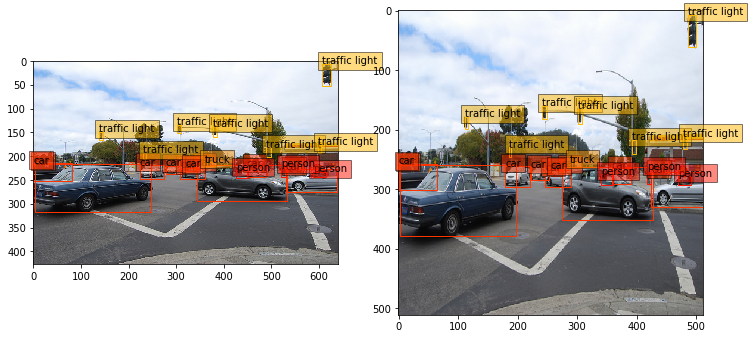

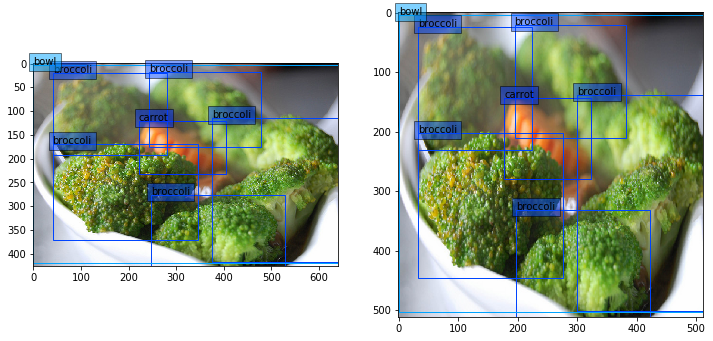

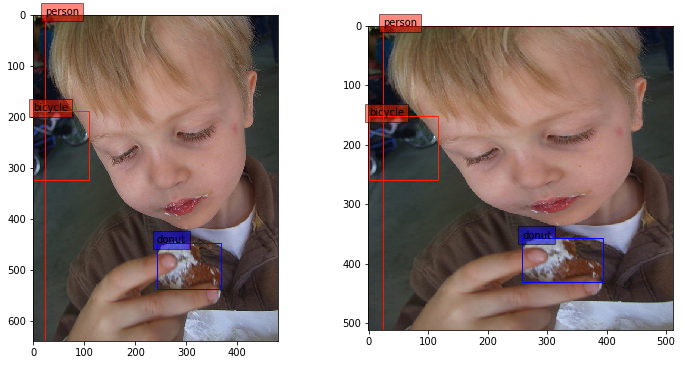

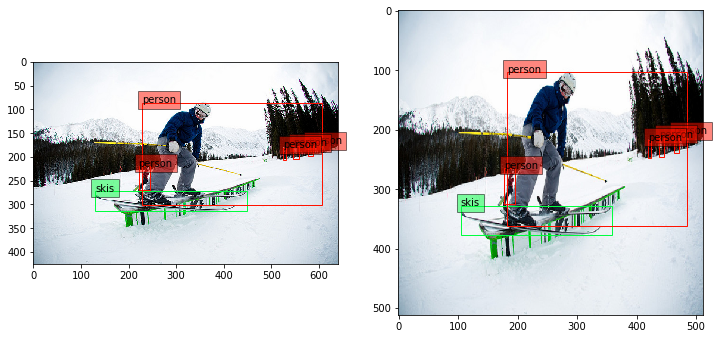

In [9]:
g = gen_train.generate(debug=True)
samples = next(g)